In [1]:
import pandas as pd
import tensorflow 
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
import re
import sklearn
from sklearn.model_selection import train_test_split
import tqdm
from gensim.models import Word2Vec
from tensorflow.keras import Sequential
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.pipeline import make_pipeline
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.layers import Conv1D, Concatenate, GlobalMaxPooling1D, GlobalAveragePooling1D, Dense, Embedding, Input,BatchNormalization
from tensorflow.keras.models import Model
import seaborn as sns


c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
df = pd.read_csv('data - data.csv').drop(columns=['Unnamed: 3'])
df.shape

(31460, 3)

In [3]:
df = df[df['rate'] != 3]
df
'''
Loại những giá trị ở cột column có giá trị = 3
'''

'\nLoại những giá trị ở cột column có giá trị = 3\n'

In [4]:
# Function to convert score to sentiment
def to_sentiment(rating):
    
    rating = int(rating)
    
    # Convert to class
    if rating <= 2:
        return 0
    else:
        return 1

# Apply to the dataset 
df['sentiment'] = df.rate.apply(to_sentiment)
'''
Apply hàm to_sentiment để xử lý giá trị của data cột rate
'''

'\nApply hàm to_sentiment để xử lý giá trị của data cột rate\n'

In [5]:
df

,comment,label,rate,sentiment
0,Áo bao đẹp ạ!!,POS,5,1
1,Tuyệt vời !,POS,5,1
2,2day ao khong giong trong.,NEG,1,0
3,"Mùi thơm,bôi lên da mềm da.",POS,5,1
4,"Vải đẹp, dày dặn.",POS,5,1
...,...,...,...,...
31455,Không đáng tiền.,NEG,1,0
31456,Quần rất đẹp.,POS,5,1
31457,Hàng đẹp đúng giá tiền.,POS,5,1
31458,Chất vải khá ổn.,POS,4,1


c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'review sentiment')

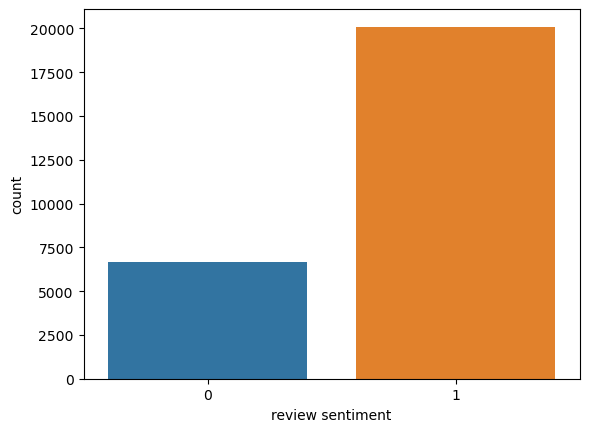

In [6]:
# # Plot the distribution
class_names = ['negative', 'positive']
'''
- Tạo 2 class: Negative n Positive
'''
sns.countplot( x='sentiment',data = df)
plt.xlabel('review sentiment')
# ax.set_xticklabels(class_names)

In [7]:
df['sentiment'].value_counts() # Đếm tổng giá trị mỗi class trong cột sentiment

sentiment
1    20093
0     6669
Name: count, dtype: int64

In [8]:
from sklearn.utils import resample

df_majority = df[(df['sentiment'] == 1)]
df_minority = df[(df['sentiment'] == 0)]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=20093, # to match majority class
                                 random_state=42)

df1 = pd.concat([df_minority_upsampled, df_majority])
''' 
- Xử lý unbalanced data bằng cách over sampling
'''


' \n- Xử lý unbalanced data bằng cách over sampling\n'

In [9]:
df1['sentiment'].value_counts() # Kết quả sau khi xử lý unbalanced data

sentiment
0    20093
1    20093
Name: count, dtype: int64

In [10]:
X = df1['comment']
y = df1['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

''' 
Chia tập train và tập test
'''

Train Data size: 32148 32148
Test Data size 8038 8038


' \nChia tập train và tập test\n'

In [11]:
tokenizer = Tokenizer() # Tokenizer is used to vectorize a text corpus by turning each text into a sequence of integers
tokenizer.fit_on_texts(X_train)
'''
- fit_on_texts method updates the internal vocabulary based on the list of texts 
- It creates a word index, where each unique word in the training set is assigned a unique integer.
'''

# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
'''
- Converts each text in the training set (X_train) into a sequence of integers
- Each word in the text is replaced by its corresponding integer from the word index.
'''
X_test = tokenizer.texts_to_sequences(X_test)
'''
- Similar to X_train
'''

'\n- Similar to X_train\n'

In [12]:
max_length = max([len(seq) for seq in X_train]) # Calculate max length of sequences in X_train
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)
'''
- pad the sequences in X_train to the same length (max_length)
- typically done by adding zeros at the beginning or end of the sequences to make them all the same length.
'''
print(f"After padding: {X_train.shape}")
print(f"After padding:{X_test.shape}") # Print Shapes of Padded Sequences

After padding: (32148, 77)
After padding:(8038, 77)


In [13]:
batch_size=1024 # the model will process 512 samples before updating the model parameters
vocab_size = len(tokenizer.word_index)+1
'''
- Total number of unique words in the tokenizer’s word index
- +1 is added to account for the padding token
- Used to define the size of the input layer in embedding layers or other layers that need to know the number of unique tokens.
'''
embedding_dim = 100
''' 
- embedding dimension: size of the vector space in which words will be embedded
- Each word represented as a vector of 100 dimensions
'''

' \n- embedding dimension: size of the vector space in which words will be embedded\n- Each word represented as a vector of 100 dimensions\n'

In [14]:
CNN=models.Sequential([
    # initialize a Sequential model, which allows you to build a neural network layer by layer
    layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
 
    layers.Dropout(0.5),
  
    
    layers.Conv1D(filters=256, kernel_size=3, activation='relu'), 
    # This Conv1D layer applies 256 convolution filters of size 3 to the input. The activation='relu' applies the ReLU activation function.
    layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    # Another Conv1D layer with the same configuration as the first one, adding more depth to the model.

    layers.GlobalMaxPooling1D(),
    
    
    layers.Flatten(),
    # Converts the 2D matrix data into a 1D vector, can be fed into fully connected (Dense) layers.
    layers.Dense(128,activation="relu"),
    # Dense layer
    layers.Dropout(0.5),
    # Another Dropout layer to prevent overfitting by randomly setting 50% of the input units to 0.
    
    layers.Dense(1, activation='sigmoid')
    # This Dense layer has 1 unit and uses the sigmoid activation function, which is suitable for binary classification tasks.
])

CNN.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
''' 
The compile method configures the model for training. It specifies:
- loss='binary_crossentropy': The loss function for binary classification.
- optimizer='adam': The Adam optimizer
- metrics=['accuracy']: The metric to evaluate during training and testing.
'''

" \nThe compile method configures the model for training. It specifies:\n- loss='binary_crossentropy': The loss function for binary classification.\n- optimizer='adam': The Adam optimizer\n- metrics=['accuracy']: The metric to evaluate during training and testing.\n"

In [15]:
history=CNN.fit(X_train, y_train, epochs=50,batch_size=batch_size)
'''
This method trains the model on the training data: 
- X_train: The input data (features) for training.
- y_train: The target data (labels) for training.
- epochs=20: The number of times the entire training dataset will pass through the model. In this case, the model will be trained for 20 epochs.
- batch_size=batch_size: The number of samples per gradient update. Here, it uses the previously defined batch_size of 512.
'''


Epoch 1/50
32/32 [==============================] - 12s 355ms/step - loss: 0.5591 - accuracy: 0.7065
Epoch 2/50
32/32 [==============================] - 11s 337ms/step - loss: 0.2442 - accuracy: 0.9116
Epoch 3/50
32/32 [==============================] - 11s 339ms/step - loss: 0.1830 - accuracy: 0.9374
Epoch 4/50
32/32 [==============================] - 11s 340ms/step - loss: 0.1586 - accuracy: 0.9465
Epoch 5/50
32/32 [==============================] - 11s 346ms/step - loss: 0.1418 - accuracy: 0.9544
Epoch 6/50
32/32 [==============================] - 11s 329ms/step - loss: 0.1234 - accuracy: 0.9615
Epoch 7/50
32/32 [==============================] - 11s 333ms/step - loss: 0.1137 - accuracy: 0.9645
Epoch 8/50
32/32 [==============================] - 11s 344ms/step - loss: 0.1088 - accuracy: 0.9665
Epoch 9/50
32/32 [==============================] - 11s 359ms/step - loss: 0.0994 - accuracy: 0.9696
Epoch 10/50
32/32 [==============================] - 11s 342ms/step - loss: 0.0920 - accura

'\nThis method trains the model on the training data: \n- X_train: The input data (features) for training.\n- y_train: The target data (labels) for training.\n- epochs=20: The number of times the entire training dataset will pass through the model. In this case, the model will be trained for 20 epochs.\n- batch_size=batch_size: The number of samples per gradient update. Here, it uses the previously defined batch_size of 512.\n'

In [16]:
CNN.evaluate(X_test, y_test)
''' 
- Evaluate the performance of a Convolutional Neural Network (CNN) model on a test dataset.
'''

252/252 [==============================] - 2s 6ms/step - loss: 0.2111 - accuracy: 0.9603


' \n- Evaluate the performance of a Convolutional Neural Network (CNN) model on a test dataset.\n'

- A lower loss indicates better performance
- It indicates that your model correctly predicted the sentiment for approximately 95.37% of the test samples.

In [17]:
CNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 77, 100)           608500    
                                                                 
 dropout (Dropout)           (None, 77, 100)           0         
                                                                 
 conv1d (Conv1D)             (None, 75, 256)           77056     
                                                                 
 conv1d_1 (Conv1D)           (None, 73, 256)           196864    
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                        

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

252/252 [==============================] - 2s 6ms/step


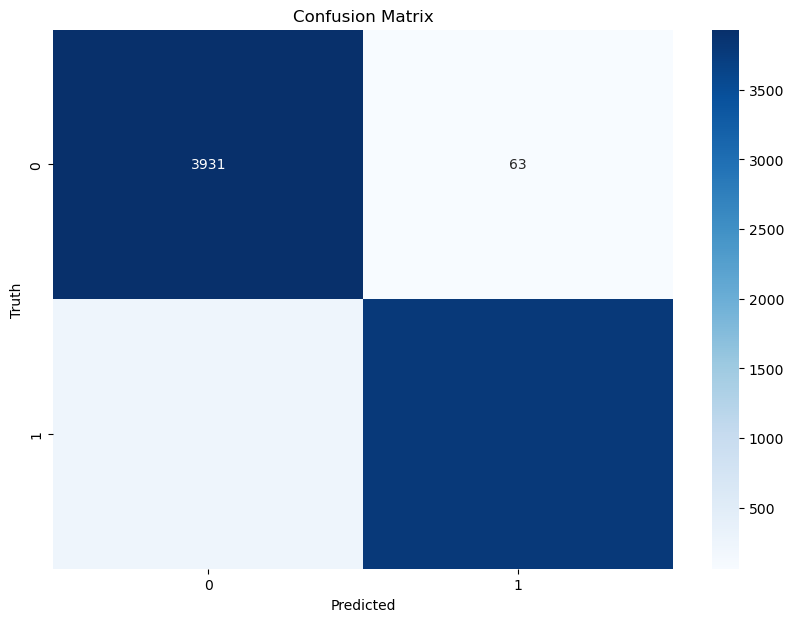

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
y_pred = CNN.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_rounded)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [20]:
from sklearn.metrics import classification_report
# Print classification report
print(classification_report(y_test, y_pred_rounded, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.94      0.98      0.96      3994
    Positive       0.98      0.94      0.96      4044

    accuracy                           0.96      8038
   macro avg       0.96      0.96      0.96      8038
weighted avg       0.96      0.96      0.96      8038



In [21]:
# Save the entire model to a HDF5 file
CNN.save('CNN_sentiment_analysis.h5')


c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## VGG-16 architecture

In [22]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model

# Define the model
embedding_layer = Embedding(vocab_size, 100, input_length=max_length, trainable=False)
sequence_input = Input(shape=(max_length,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

x = Conv1D(64, 3, activation='relu', padding='same')(embedding_sequences)
x = Conv1D(64, 3, activation='relu', padding='same')(x)
x= MaxPooling1D(pool_size=3, strides=1, padding='same')(x)

x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=3, strides=1, padding='same')(x)

x = Conv1D(256, 3, activation='relu', padding='same')(x)
x = Conv1D(256, 3, activation='relu', padding='same')(x)
x = Conv1D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=3, strides=1, padding='same')(x)

x = Conv1D(512, 3, activation='relu', padding='same')(x)
x = Conv1D(512, 3, activation='relu', padding='same')(x)
x = Conv1D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=3, strides=1, padding='same')(x)

x = Conv1D(512, 3, activation='relu', padding='same')(x)
x = Conv1D(512, 3, activation='relu', padding='same')(x)
x = Conv1D(512, 3, activation='relu', padding='same')(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)

outputs = Dense(1, activation='sigmoid')(x)

model_vgg16 = Model(sequence_input, outputs)

# Compile the model
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model_vgg16.fit(X_train, y_train, batch_size=64, epochs=5)


Epoch 1/5
503/503 [==============================] - 235s 464ms/step - loss: 0.6933 - accuracy: 0.5003
Epoch 2/5
503/503 [==============================] - 237s 470ms/step - loss: 0.6932 - accuracy: 0.4974
Epoch 3/5
503/503 [==============================] - 239s 474ms/step - loss: 0.6932 - accuracy: 0.4968
Epoch 4/5
503/503 [==============================] - 236s 470ms/step - loss: 0.6932 - accuracy: 0.4974
Epoch 5/5
503/503 [==============================] - 236s 469ms/step - loss: 0.6932 - accuracy: 0.4983


In [24]:
loss, accuracy = model_vgg16.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

252/252 [==============================] - 15s 61ms/step - loss: 0.6932 - accuracy: 0.4969
Test Loss: 0.6932142972946167
Test Accuracy: 0.49688977003097534


In [25]:
model_vgg16.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 77)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 77, 100)           608500    
                                                                 
 conv1d_2 (Conv1D)           (None, 77, 64)            19264     
                                                                 
 conv1d_3 (Conv1D)           (None, 77, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1  (None, 77, 64)            0         
 D)                                                              
                                                                 
 conv1d_4 (Conv1D)           (None, 77, 128)           24704     
                                                             

## Inception Architecture

In [26]:
# Define the model
sequence_input = Input(shape=(max_length,), dtype='int32')
# This defines the input layer of the model, where max_length is the length of the input sequences.

embedding_sequences = embedding_layer(sequence_input)
# Apply an embedding layer to the input sequences, convert them into dense vectors of fixed size

l1 = Conv1D(64, 1, activation='relu', padding='same')(embedding_sequences)
l2 = Conv1D(64, 3, activation='relu', padding='same')(embedding_sequences)
l3 = Conv1D(64, 5, activation='relu', padding='same')(embedding_sequences)
l4 = Conv1D(64, 7, activation='relu', padding='same')(embedding_sequences)
l5 = Conv1D(64, 9, activation='relu', padding='same')(embedding_sequences)
''' 
- 1D convolutional layers with different filter sizes (1, 3, 5, 7, and 9). Each layer has 64 filters and uses the ReLU activation function. 
- The padding='same' ensures that the output has the same length as the input.
'''

l6 = MaxPooling1D(pool_size=3, strides=1, padding='same')(embedding_sequences)
l6 = Conv1D(64, 1, activation='relu', padding='same')(l6)
'''
- This applies a max pooling layer with a pool size of 3 and stride of 1, 
followed by a 1D convolutional layer with 64 filters and a filter size of 1
'''

l = Concatenate(axis=-1)([l1, l2, l3, l4, l5, l6])
# This concatenates the outputs of all the convolutional layers along the last axis, combining their features.
l = Flatten()(l)
# This flattens the concatenated output into a 1D vector.
l = Dense(512, activation='relu')(l)
l = Dense(512, activation='relu')(l)
# These are two fully connected (dense) layers with 512 units each, using the ReLU activation function.

outputs = Dense(1, activation='sigmoid')(l)
# This is the output layer with a single unit and a sigmoid activation function, suitable for binary classification

model_inception = Model(sequence_input, outputs)
# Combines the input and output layers into a model.

model_inception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Compile the model 


In [27]:
history = model_inception.fit(X_train, y_train, batch_size=512, epochs=20)
'''
This method trains the model on the training data: 
- X_train: The input data (features) for training.
- y_train: The target data (labels) for training.
- epochs=5: The number of times the entire training dataset will pass through the model. In this case, the model will be trained for  epochs.
- batch_size=batch_size: The number of samples per gradient update. Here, it uses the previously defined batch_size of 512.
'''


Epoch 1/20
63/63 [==============================] - 18s 275ms/step - loss: 0.5359 - accuracy: 0.7124
Epoch 2/20
63/63 [==============================] - 17s 275ms/step - loss: 0.2945 - accuracy: 0.8830
Epoch 3/20
63/63 [==============================] - 17s 274ms/step - loss: 0.1819 - accuracy: 0.9362
Epoch 4/20
63/63 [==============================] - 17s 272ms/step - loss: 0.1007 - accuracy: 0.9704
Epoch 5/20
63/63 [==============================] - 17s 271ms/step - loss: 0.0583 - accuracy: 0.9849
Epoch 6/20
63/63 [==============================] - 17s 275ms/step - loss: 0.0361 - accuracy: 0.9910
Epoch 7/20
63/63 [==============================] - 18s 283ms/step - loss: 0.0283 - accuracy: 0.9928
Epoch 8/20
63/63 [==============================] - 18s 288ms/step - loss: 0.0211 - accuracy: 0.9947
Epoch 9/20
63/63 [==============================] - 18s 281ms/step - loss: 0.0254 - accuracy: 0.9926
Epoch 10/20
63/63 [==============================] - 18s 285ms/step - loss: 0.0204 - accura

'\nThis method trains the model on the training data: \n- X_train: The input data (features) for training.\n- y_train: The target data (labels) for training.\n- epochs=5: The number of times the entire training dataset will pass through the model. In this case, the model will be trained for  epochs.\n- batch_size=batch_size: The number of samples per gradient update. Here, it uses the previously defined batch_size of 512.\n'

In [28]:
loss, accuracy = model_inception.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

252/252 [==============================] - 3s 12ms/step - loss: 0.3094 - accuracy: 0.9548
Test Loss: 0.3093855679035187
Test Accuracy: 0.9548395276069641


252/252 [==============================] - 3s 12ms/step


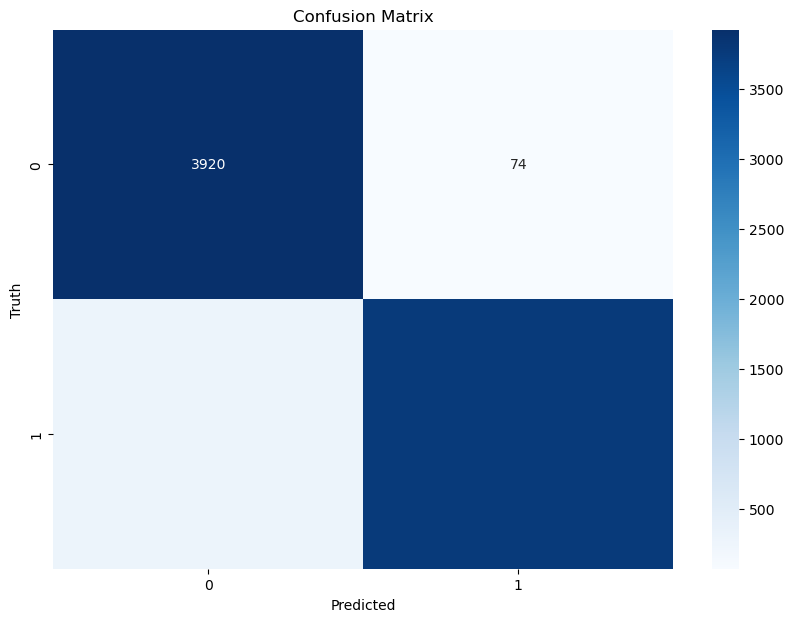

In [29]:
y_pred = model_inception.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [30]:
# Print classification report
print(classification_report(y_test, y_pred_rounded, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.93      0.98      0.96      3994
    Positive       0.98      0.93      0.95      4044

    accuracy                           0.95      8038
   macro avg       0.96      0.96      0.95      8038
weighted avg       0.96      0.95      0.95      8038



In [31]:
def predict_sentiments(model, tokenizer, df1, num_samples=10):
    results = []
    for _ in range(num_samples):
        index = np.random.randint(0, len(df1))
        comment = df1.iloc[index]['comment']
        y_true = df1.iloc[index]['sentiment']
        sequence = tokenizer.texts_to_sequences([comment])
        padded_sequence = pad_sequences(sequence, maxlen=max_length)
        prediction = model.predict(padded_sequence)[0][0]
        sentiment = "Positive" if prediction >= 0.5 else "Negative"
        results.append((comment, sentiment, y_true))

    return results

results = predict_sentiments(CNN, tokenizer, df1, num_samples=30)
for i, (comment, sentiment, y_true) in enumerate(results, 1):
    print(f"Sample {i}:")
    print("comment:", comment)
    print("Predicted Sentiment:", sentiment)
    print("True Sentiment:", "Positive" if y_true == 1 else "Negative")
    print()

1/1 [==============================] - 0s 14ms/step
Sample 1:
comment: Màu không đc đẹp.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 2:
comment: Chân váy đẹp, dày dặn y hình.
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 3:
comment: Tặng con sếp nên thấy chất lượng ok.
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 4:
comment: Vừa gì đâu, thấy áo đẹp nên mới mua, lừa tình quá đi.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 5:
comment: Mình mua vàng đen lại gửi cho mình đỏ đen.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 6:
comment: Kiểu dáng được nhưng chất vải hơi nóng.
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 7:
comment: Chất lượng sản phẩm tuyệt vời chua thử nen chua bit the nao Chất lượng sản phẩm tuyệt vời.hnay thu tẩy sp sạch vượt mức tuong tượng ok cho shop 5sao.
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 8:
comment: Phí cao quá(lấy lại 1 sao).
Pred

In [32]:
results = predict_sentiments(model_inception, tokenizer, df1, num_samples=30)
for i, (comment, sentiment, y_true) in enumerate(results, 1):
    print(f"Sample {i}:")
    print("comment:", comment)
    print("Predicted Sentiment:", sentiment)
    print("True Sentiment:", "Positive" if y_true == 1 else "Negative")
    print()

1/1 [==============================] - 0s 19ms/step
Sample 1:
comment: Dây cột nơ không được dài như trong hình.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 2:
comment: Vải ngoài tốt nhưng lớp lót ko đc tốt lắm.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 3:
comment: Mũ hơi rộng, đội không ôm đầu lắm nhưng vẫn ổn ^^.
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 4:
comment: Màu không đc đẹp.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 5:
comment: Đóng gói sp cũng sơ sài.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 6:
comment: Mẹ mình k vừa size muốn đổi size lớn hơn chị chủ rất nhiệt tư vấn, có tâm lắm.
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 7:
comment: Chất vải hơi mỏng, màu đỏ hơi tối so với trên ảnh.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 8:
comment: Rất đáng tiền,.
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 9:
comment: Chất

In [36]:
results1 = predict_sentiments(CNN, tokenizer, df1, num_samples=1000)
for i, (comment, sentiment, y_true) in enumerate(results, 1):
    print(f"Sample {i}:")
    print("comment:", comment)
    print("Predicted Sentiment:", sentiment)
    print("True Sentiment:", "Positive" if y_true == 1 else "Negative")
    print()

1/1 [==============================] - 0s 14ms/step
Sample 1:
comment: Dây cột nơ không được dài như trong hình.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 2:
comment: Vải ngoài tốt nhưng lớp lót ko đc tốt lắm.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 3:
comment: Mũ hơi rộng, đội không ôm đầu lắm nhưng vẫn ổn ^^.
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 4:
comment: Màu không đc đẹp.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 5:
comment: Đóng gói sp cũng sơ sài.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 6:
comment: Mẹ mình k vừa size muốn đổi size lớn hơn chị chủ rất nhiệt tư vấn, có tâm lắm.
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 7:
comment: Chất vải hơi mỏng, màu đỏ hơi tối so với trên ảnh.
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 8:
comment: Rất đáng tiền,.
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 9:
comment: Chất

In [34]:
model_inception.save('inception_sentiment_analysis.h5')


c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
